<a href="https://colab.research.google.com/github/emanbuc/ASL-Recognition-Deep-Learning/blob/main/FastAI_Static_Gesture_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install fastai --upgrade -q


In [65]:
from fastai.vision.all import *
from google.colab import drive
from google.colab import drive
drive.mount('/gdrive',force_remount=true)


Mounted at /gdrive


In [78]:
root_dir = '/gdrive/MyDrive/Gesture/'
imagePath=Path(root_dir + 'images')

In [79]:
imagePath

Path('/gdrive/MyDrive/Gesture/images')

In [80]:
import os



files = os.listdir(imagePath)

for f in files:
	print(f)


test_image_FS_A_221.png
test_image_FS_A_224.png
test_image_FS_A_223.png
test_image_FS_A_222.png
test_image_FS_A_225.png
test_image_FS_A_230.png
test_image_FS_A_228.png
test_image_FS_A_229.png
test_image_FS_A_226.png
test_image_FS_A_227.png
test_image_FS_A_231.png
test_image_FS_B_231.png
test_image_FS_B_234.png
test_image_FS_B_232.png
test_image_FS_B_233.png
test_image_FS_B_239.png
test_image_FS_B_235.png
test_image_FS_B_237.png
test_image_FS_B_238.png
test_image_FS_B_236.png
test_image_FS_B_242.png
test_image_FS_B_244.png
test_image_FS_B_241.png
test_image_FS_B_245.png
test_image_FS_B_240.png
test_image_FS_B_243.png
test_image_FS_C_391.png
test_image_FS_C_393.png
test_image_FS_C_394.png
test_image_FS_C_395.png
test_image_FS_C_392.png
test_image_FS_C_396.png
test_image_FS_C_397.png
test_image_FS_C_398.png
test_image_FS_C_399.png
test_image_FS_C_400.png
test_image_FS_C_401.png


In [81]:
fnames = get_image_files(imagePath)
fnames

(#37) [Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_221.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_224.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_223.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_222.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_225.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_230.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_228.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_229.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_226.png'),Path('/gdrive/MyDrive/Gesture/images/test_image_FS_A_227.png')...]

In [83]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=Pipeline([attrgetter("name"),RegexLabeller(pat = r'^.*_([A-Z])_\d+.png$')]),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   item_tfms = Resize(224))

In [84]:
dsets = dblock.datasets(imagePath)


In [85]:
dsets.train[0]


(PILImage mode=RGB size=375x277, TensorCategory(1))

In [90]:
dl= dblock.dataloaders(imagePath,bs=32)

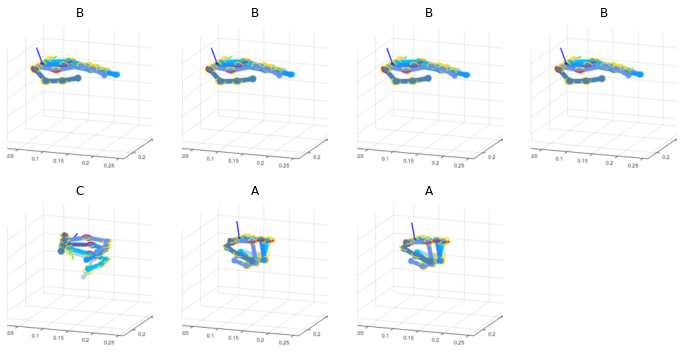

In [91]:
dl.valid.show_batch(max_n=12, nrows=2)

Convoluted neural network (CNN) is the de facto standard neural network type for image classification. We will use resnet34 (i.e. a well known 34 layers deep CNN).

We are using the .fine_tune method instead of .fit because we are leveraging on the pretrained general purpose resnet model to perform transfer learning. In the fine_tune we specify the number of epochs to be 4.

In [93]:
learn = cnn_learner(dl, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,nan,3.002862,0.428571,00:13


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,3.002862,0.428571,00:01
1,nan,3.002862,0.428571,00:01
2,nan,3.002862,0.428571,00:01
3,nan,3.002862,0.428571,00:01


Looking at the Confusion Matrix for better visualization of the results.

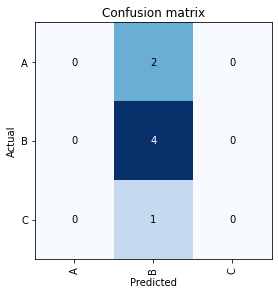

In [94]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

fast.ai also provides a easy method that allows us to find out which are the images where there was the highest loss. 

The loss is a number that is higher if the model is incorrect (especially if it is also confident of its incorrect answer), or if it is correct, but not confident of its correct answer.

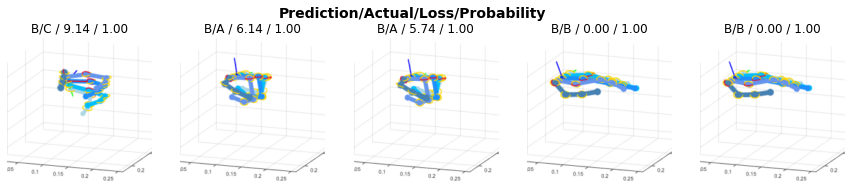

In [96]:
interpretation.plot_top_losses(5, nrows=1)

export the model

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
Use model for inference

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('test_images/test_image_ADA_A_600.png')
('whisky', tensor(1), tensor([4.1783e-04, 9.9951e-01, 7.0310e-05]))
learn_inf.dls.vocab
['beer', 'whisky', 'wine']

# Nuova sezione